In [1]:
import sys
#sys.path.append('../input-archives/TensorFlow/models/research')
sys.path.append('../src')

In [2]:
from vipir.vipir import vipir as vp
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

## Basic O-, X-Power Image

In [3]:
cdf = vp(r"../data/WI937cache/WI937_2020215084203.NGI")

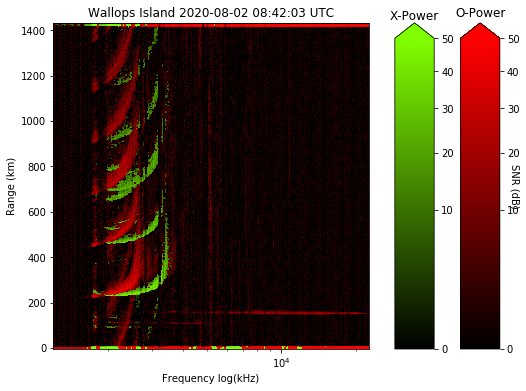

In [4]:
fig = plt.figure(figsize=(8,6))
ax = cdf.plot_pwr(fig)

# Trace Detection Step by Step

## 1. Consolidate O-, X-Power into Single Measure

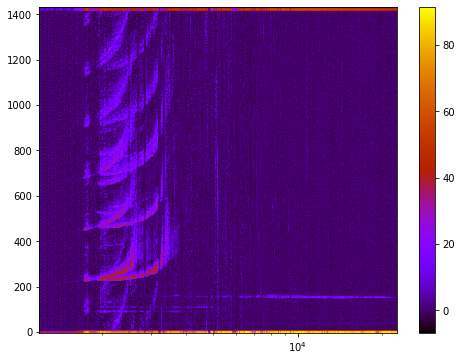

In [5]:
thresh = 3.0 #db; threshold by which x-power must exceed o-power to show up on graph

#get the powers
x_pwr = cdf.snr('X_mode_power')
o_pwr = cdf.snr('O_mode_power')

#choose between x- and o- power
pwr = np.where(x_pwr >= o_pwr+thresh, x_pwr, o_pwr)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
pcm = ax.pcolormesh(cdf.freq, cdf.rng, pwr.T, cmap='gnuplot')
fig.colorbar(pcm)
ax.set_xscale('log')


# 2. Lose the Background

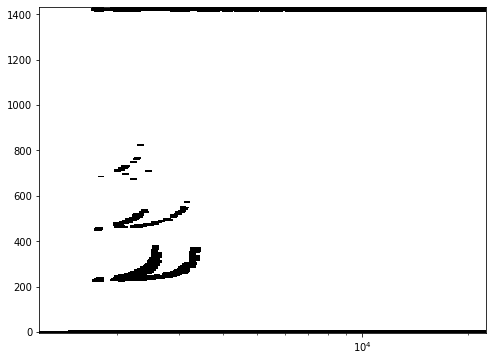

In [6]:
import scipy.ndimage as nd


size = 5 # of convolution

#convolve (max) to increase the connectivity
pwr = nd.generic_filter(pwr,np.max,size=size,mode='nearest')

#mask out the backgound (and transpose)
imthresh = 30 # minimum pwr (db) to  be considered

im = pwr.T >= imthresh
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
pcm = ax.pcolormesh(cdf.freq, cdf.rng, im, cmap='binary')
#fig.colorbar(pcm)
ax.set_xscale('log')

## 3. Find the features

17 features found


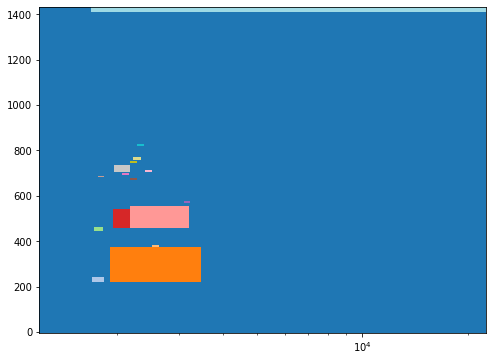

In [7]:
#label and find the features in the masked image
feats, nfeats = nd.label(im, structure=nd.generate_binary_structure(2,2))
#get the object slices
objs = nd.find_objects(feats)
feat_im = np.zeros(im.shape)
print(f'{nfeats} features found')
for i in range(nfeats):
    feat_im[objs[i]]=i
    
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
pcm = ax.pcolormesh(cdf.freq, cdf.rng, feat_im, cmap='tab20')
ax.set_xscale('log')

## 4. Find largest feature:

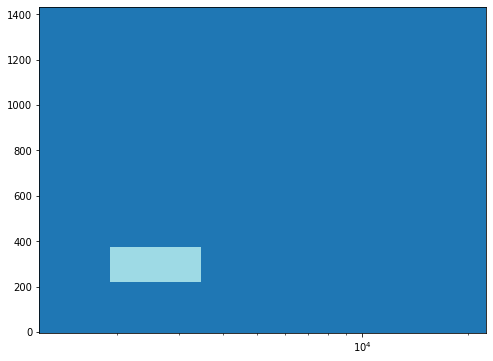

In [8]:
#calculate the areas of the objects and find the largest
areas = np.array([ (s[0].stop-s[0].start)*(s[1].stop-s[1].start) for s in objs])
b = areas.argmax() #index of the object covering largest area
feat_im = np.zeros(im.shape)
feat_im[objs[b]]=b

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
pcm = ax.pcolormesh(cdf.freq, cdf.rng, feat_im, cmap='tab20')
ax.set_xscale('log')

## 5. Calculate Bounding Box

In [9]:
#map array indicies back to freq and range
bbox = {'freqstart': cdf.freq[objs[b][1].start],
        'freqend':   cdf.freq[objs[b][1].stop-1],
        'rngstart':  cdf.rng[ objs[b][0].start],
        'rngend':    cdf.rng[ objs[b][0].stop-1]}
bbox

{'freqstart': 1913.149,
 'freqend': 3455.131,
 'rngstart': 223.34123,
 'rngend': 376.23538}

## 6. Draw box on Original Image

In [10]:
import matplotlib.patches as patches
def draw_box_on_axis(ax, l_left=None, xext=None, yext=None, bbox=None,
                    label=None, color='red', linestyle='-',linewidth=3):
    
    if bbox is not None:
        ll_left =  (bbox['freqstart'], bbox['rngstart'])
        l_xext = bbox['freqend']-bbox['freqstart']
        l_yext = bbox['rngend']-bbox['rngstart']
    else:
        ll_left = l_left
        l_xext = xext
        l_yext = yext
        

    r = patches.Rectangle( ll_left, l_xext, l_yext, facecolor='none',
                      edgecolor= color, linestyle=linestyle, linewidth=linewidth, label=label)

    ax.add_patch(r)

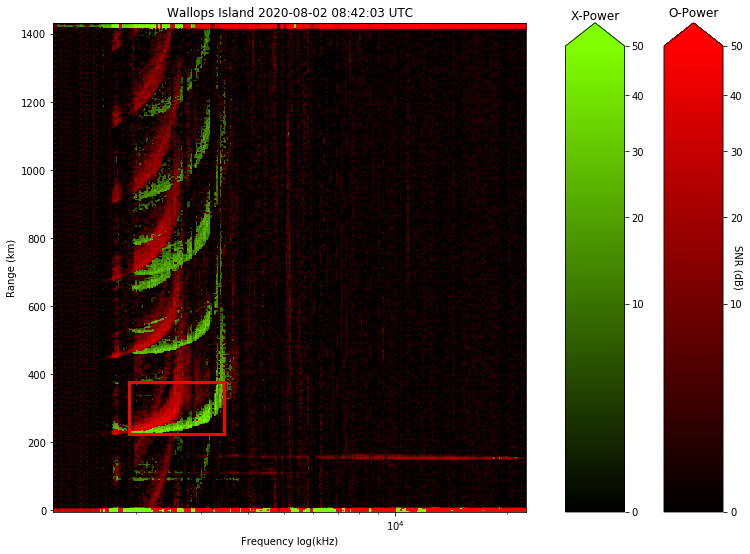

In [11]:
fig = plt.figure(figsize=(12,9))
ax=cdf.plot_pwr(fig)
draw_box_on_axis(ax, bbox=bbox)

In [ ]:
img=cdf.image()

display(img)

In [ ]:
wi2= vp(r'../data/netcdf/WI937_2020016101802.NGI')

In [ ]:
display(wi2.image())

In [ ]:
img_np = cdf.img_array()

In [ ]:
img_np.shape

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(24,9))
ax[0].imshow(img_np,origin='lower', aspect='auto',
         extent=[cdf.minfreq, cdf.maxfreq, cdf.minrng, cdf.maxrng])
ax[1].imshow(cdf.image())


In [ ]:
x_pwr = cdf.snr('X_mode_power')
o_pwr = cdf.snr('O_mode_power')
thresh = 3
pwr = np.where(x_pwr >= o_pwr+thresh, x_pwr, o_pwr)

In [ ]:
#to increase the connectivity
pwr = nd.generic_filter(pwr,np.max,size=5,mode='nearest')

In [ ]:
imthresh = 30
im = pwr.T >= imthresh

In [ ]:
display(im)

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(24,9))
pcm = ax[0].pcolormesh(cdf.freq, cdf.rng, pwr.T, cmap='gnuplot')
pcm = ax[1].pcolormesh(cdf.freq, cdf.rng, im, cmap='binary')

In [ ]:
import matplotlib.patches as patches
def draw_box_on_axis(ax, l_left, xext, yext,
                    label=None, color='red', linestyle='-',linewidth=3):

    r = patches.Rectangle( l_left, xext, yext,facecolor='none',
                      edgecolor= color, linestyle=linestyle, linewidth=linewidth, label=label)

    ax.add_patch(r)

In [ ]:
feats, nfeats = nd.label(im, structure=nd.generate_binary_structure(2,2))
print(f'Number of features: {nfeats}')

In [ ]:
objs = nd.find_objects(feats)

In [ ]:
areas = np.array([ (s[0].stop-s[0].start)*(s[1].stop-s[1].start) for s in objs])

In [ ]:
areas

In [ ]:
areas.argmax()

In [ ]:
b = 1
fig, ax = plt.subplots(1,1,figsize=(12,9))
pcm = ax.pcolormesh(cdf.freq, cdf.rng, im, cmap='binary')
freqstart = cdf.freq[objs[b][1].start];  freqend = cdf.freq[objs[b][1].stop]
rngstart =  cdf.rng[ objs[b][0].start];  rngend =  cdf.rng[ objs[b][0].stop]
draw_box_on_axis(ax, (freqstart, rngstart), freqend-freqstart, rngend-rngstart)

In [ ]:
cdf.station + ' ' +cdf.obs_time.strftime('%Y-%m-%d %H:%M:%S %Z')

In [ ]:
from numpy.ma import masked_array
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

# draw the box on the real image
def plot_pwr(self, ax, thresh=3.0, gamma=0.5):

    o_pwr = self.snr('O_mode_power')
    x_pwr = self.snr('X_mode_power')
    x_pwr_m = masked_array(x_pwr, x_pwr <=  o_pwr+thresh)
    o_pwr_m = masked_array(o_pwr, x_pwr >   o_pwr+thresh)
    
    freq = self.freq
    rng = self.rng
    
    #set up the figure
    gs = gridspec.GridSpec(1,3, width_ratios=[8,1,1])
    ax = fig.add_subplot(gs[0], frameon=True)

    
    cmaps = self.get_colormaps()
  
    px = ax.pcolormesh(freq, rng, x_pwr_m.T,cmap=cmaps['green_hsv'],
               norm=colors.PowerNorm(gamma=gamma),
              vmin=0, vmax=50)
    cax_x = fig.add_subplot(gs[1],frameon=False)
    cba = plt.colorbar(px, cax=cax_x, shrink=0.75, fraction=0.5,
                       extend='max')
    cax_x.set_title('X-Power', pad=0.1)

    po = ax.pcolormesh(freq, rng, o_pwr_m.T,cmap=cmaps['red_hsv'],
                   norm=colors.PowerNorm(gamma=gamma),
                  vmin=0, vmax=50)
    cax_o = fig.add_subplot(gs[2],frameon=False)
    cbb = plt.colorbar(po, cax=cax_o,shrink=0.25, fraction=0.5,
                     extend='max')
    cax_o.set_title('O-Power')
    cax_o.set_ylabel('SNR (dB)', rotation=270, labelpad=0.15)

    ax.set_xscale('log')
    #ax.set_yscale('log')
    
    ax.set_ylabel('Range (km)')
    ax.set_xlabel('Frequency log(kHz)')
    
    ax.set_title(self.station + ' ' +self.obs_time.strftime('%Y-%m-%d %H:%M:%S %Z'))
    
    return ax

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plot_pwr(cdf,fig)
draw_box_on_axis(ax, (freqstart, rngstart), freqend-freqstart, rngend-rngstart)


In [ ]:
fig = plt.figure(figsize=(8,6))
#set up the figure
gs = gridspec.GridSpec(1,3, width_ratios=[8,1,1])
ax = fig.add_subplot(gs[0], frameon=True)
pcm = ax.pcolormesh(cdf.freq, cdf.rng, im, cmap='binary')
cax = fig.add_subplot(gs[1])
cox = fig.add_subplot(gs[2])

In [ ]:
def get_trace_bbox(self, imthresh = 30.0, thresh=3.0, size=5):
    
    #make the image power array
    x_pwr = self.snr('X_mode_power')
    o_pwr = self.snr('O_mode_power')
    pwr = np.where(x_pwr >= o_pwr+thresh, x_pwr, o_pwr)
    
    #convolve (max) to increase the connectivity
    pwr = nd.generic_filter(pwr,np.max,size=5,mode='nearest')
    
    #mask out the backgound (and transpose)
    im = pwr.T >= imthresh
    
    #label and find the features in the masked image
    feats, nfeats = nd.label(im, structure=nd.generate_binary_structure(2,2))
    #get the object slices
    objs = nd.find_objects(feats)
    
    #calculate the areas of the objects and find the largest
    areas = np.array([ (s[0].stop-s[0].start)*(s[1].stop-s[1].start) for s in objs])
    b = areas.argmax() #index of the object covering largest area
    
    #dredge up the freq and range vals for the bbox
    bbox = {'freqstart': self.freq[objs[b][1].start],
            'freqend':   self.freq[objs[b][1].stop],
            'rngstart':  self.rng[ objs[b][0].start],
            'rngend':    self.rng[ objs[b][0].stop]}
    
    return bbox
    

In [ ]:
bbox = get_trace_bbox(cdf)

In [ ]:
bbox

In [ ]:
wi2_trace = get_trace_bbox(wi2)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
plot_pwr(wi2,ax)
draw_box_on_axis(ax, (wi2_trace['freqstart'], wi2_trace['rngstart']),
                 wi2_trace['freqend']-wi2_trace['freqstart'],
                 wi2_trace['rngend']-wi2_trace['rngstart'])

In [ ]:
freqstart, freqend, rngstart, rngend

In [ ]:
objs[13]

In [ ]:
(objs[13][0].start, objs[13][1].start), objs[13][0].stop-objs[13][0].start, objs[13][1].stop-objs[13][1].start

In [ ]:
import scipy.ndimage as nd

In [ ]:
objs = nd.find_objects(feats)

In [ ]:
im[objs[10]]

In [ ]:
areas[13]

In [ ]:
objs[13]

In [ ]:
objs[0]

In [ ]:
xx=slice(0,10)

In [ ]:
xx.stop

In [ ]:
nd.generate_binary_structure(2,2)

In [ ]:
b=20
xstart = objs[b][1].start; xend = objs[b][1].stop
ystart = objs[b][0].start; yend = objs[b][0].stop
fig, ax = plt.subplots(1,1,figsize=(12,9))
ax.imshow(im, origin='lower')
draw_box_on_axis(ax, (xstart, ystart), xend-xstart, yend-ystart)

## Apply Annotations

In [ ]:
from numpy.ma import masked_array
import matplotlib.colors
def plot_obs(self, ax=None, thresh=3.0, gamma=0.5):

    cmaps = self.get_colormaps()
    norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

    #get the plot axes
    freq = self.freq
    rng = self.rng

    #get the power measures
    o_pwr = self.snr(which='O_mode_power')
    x_pwr = self.snr(which='X_mode_power')

    # identify the cells in which x_pwr exceeds o_pwr by more than the threshold
    mask = x_pwr > o_pwr+thresh

    # mask out the o_ and x_pwr values
    x_pwr_m = masked_array(x_pwr, np.logical_not(mask))
    o_pwr_m = masked_array(o_pwr, mask)

    px = ax.pcolormesh(freq, rng, x_pwr_m.T,cmap=cmaps['green_hsv'],
           #norm=colors.PowerNorm(gamma=gamma),
          vmin=0, vmax=50)

    po = ax.pcolormesh(freq, rng, o_pwr_m.T,cmap=cmaps['red_hsv'],
           #norm=colors.PowerNorm(gamma=gamma),
          vmin=0, vmax=50)
    
    ax.set_yscale('log')
    ax.set_ylim(50,1000)
    ax.set_xscale('log')
    ax.set_xlim(1500, 20000)
    ax.set_title(f'Station: {self.station}\nDateTime: {self.obs_time}',
            fontdict={'size':16, 'weight':'bold'})
    ax.grid(color='lightgray')


In [ ]:
import urllib

In [ ]:
with urllib.request.urlopen('ftp://ftp.ngdc.noaa.gov/ionosonde/data/WI937/individual/2020/004/image/WI937_2020004132403_OX.PNG') as f:
    a = plt.imread(f, format='png')


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(a,aspect='auto')
ax[0].set_axis_off()

plot_obs(cdf,ax[1])
print(f'DataLim: {ax[1].dataLim}')

In [ ]:
[cdf.minfreq, cdf.maxfreq,cdf.minrng, cdf.maxrng]

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(cdf.image())

## Coordinate Transformation

In [ ]:
(cdf.minfreq, cdf.maxfreq, cdf.nfreq)

In [ ]:
(cdf.minrng, cdf.maxrng, cdf.nrng)

## Baseline Plot

In [ ]:
cdf.coords_to_pixel((1201.0, -4.5))

In [ ]:
cdf.coords_to_pixel((22470.455, cdf.maxrng))

In [ ]:
#r = Rectangle((2000,200),3300, 500, edgecolor='r', lw=5, facecolor='none')
box_coords = [(2000,200),(2000,700),(5300, 200), (5300, 700)] # in (freq, rng)

In [ ]:
box_pix = [cdf.coords_to_pixel(p) for p in box_coords]

In [ ]:
box_pix

In [ ]:
from PIL import Image, ImageDraw

im = cdf.image()

draw = ImageDraw.Draw(im)
draw.rectangle([box_pix[0], box_pix[3]],outline='red', width=5)
display(im)

## From Processed Files

In [ ]:
f = 'SJJ18_2019207182201'
dir = '../models/resnet_train/data/'


In [ ]:
!pwd

In [ ]:
im = Image.open(dir+'images/'+f+'.jpg')

In [ ]:
display(im)

In [ ]:
mask = Image.open(dir+'trimaps/'+f+'.png')

In [ ]:
display(mask)

In [ ]:
np.asarray(mask).sum()

In [ ]:
from xml.etree import ElementTree as ET
from os.path import join

def xmltodict(xmlfile, ALLXMLDIR='../models/resnet_train/data/annotations/xmls'):
    retdict = {}
    xml = ET.parse(join(ALLXMLDIR, xmlfile))
    root_element = xml.getroot()
    retdict['folder'] = root_element.find('folder').text
    retdict['basename'] = root_element.find('filename').text.split('.')[0] # just the basename
    objs = root_element.findall('object')
    # better just be one
    assert(len(objs)==1)
    retdict['name'] = objs[0].find('name').text

    #get the bounding box
    retdict['bndbox'] = {}
    bbox = objs[0].find('bndbox')
    retdict['bndbox']['xmin'] = int(bbox.find('xmin').text)
    retdict['bndbox']['ymin'] = int(bbox.find('ymin').text)
    retdict['bndbox']['xmax'] = int(bbox.find('xmax').text)
    retdict['bndbox']['ymax'] = int(bbox.find('ymax').text)

    return retdict

In [ ]:
bbox = xmltodict(f+'.xml')['bndbox']

In [ ]:
draw = ImageDraw.Draw(im)
draw.rectangle([(bbox['xmin'], bbox['ymin']), (bbox['xmax'], bbox['ymax'])],outline='red', width=5)
display(im)

In [ ]:
PIL.ImageDraw.ImageDraw.rectangle(xy, fill=None, outline=None, width=0)

In [ ]:
import pandas as pd

In [ ]:
pd.Timestamp(cdf.obs_time)

In [ ]:
snr=cdf.snr()
minsnr = snr.min()
maxsnr = snr.max()

In [ ]:
(minsnr, maxsnr)

In [ ]:
cmap = matplotlib.cm.get_cmap('gnuplot')

In [ ]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

In [ ]:
cmap(norm(5.0))

In [ ]:
cmap(norm(np.linspace(5.0,7.0,10)), bytes=True)

In [ ]:
snr_np = cmap(norm(snr.T), bytes=True)

In [ ]:
snr_np.shape

In [ ]:
snr_im = Image.fromarray(snr_np, mode='RGBA').transpose(Image.FLIP_TOP_BOTTOM)

In [ ]:
display(snr_im)

In [ ]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(snr_im)
display(enh.enhance(1.5))

In [ ]:
snr_im.size

In [ ]:
from PIL import ImageDraw

In [ ]:
box = [(150,300), (150,450), (225,450), (225,300),(150,300)]

In [ ]:
snr_im.size

In [ ]:
def coords_to_pix(freq, rng):
    # the index of freq and rng in their respective arrays are the image pixel indexes
    

In [ ]:
snr_im = Image.fromarray(snr_np, mode='RGBA').transpose(Image.FLIP_TOP_BOTTOM)
draw = ImageDraw.Draw(snr_im)
draw.line(box, fill=128, width=5, joint='curve')
draw.point((250,75),fill=255)
#out = Image.alpha_composite(snr_im, draw)
display(snr_im)

In [ ]:
display(snr_im)

In [ ]:
PIL.ImageDraw.ImageDraw.line(xy, fill=None, width=0, joint=None)

In [ ]:
display(test_im)

In [ ]:
test_im=Image.open('testplot.jpg')

In [ ]:
a = np.asarray(test_im)

In [ ]:
a.shape

In [ ]:
a[220,220]

In [ ]:
test_im